In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv("100k_a.csv",  header=None, names=['user_id', 'stream_id', 'streamer', 'time_start','time_stop'])
df.head()

,user_id,stream_id,streamer,time_start,time_stop
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [14]:
df['time_start'] = df['time_start'] * 10
df['time_stop'] = df['time_stop'] * 10
df['time_watched'] = (df['time_stop'] - df['time_start'] )

In [15]:
df['hour_of_day'] = (df['time_start'] % (24*60)) // 60


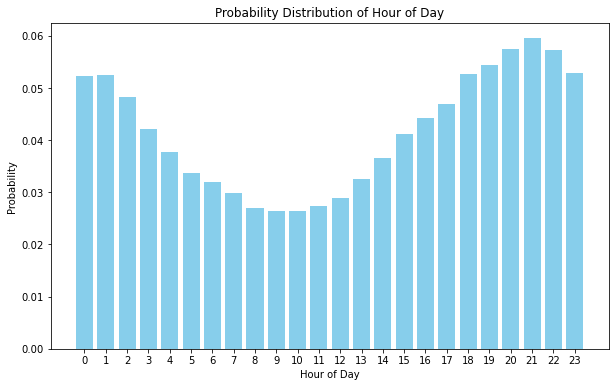

In [6]:
# Assuming 'hour_of_day' is a column in your DataFrame df that contains hours in 24-hour format (0-23)
hourly_counts = df['hour_of_day'].value_counts(normalize=True).sort_index()

# Convert the Series to DataFrame for a nicer display and reset the index for plotting
hourly_distribution_df = hourly_counts.reset_index()
hourly_distribution_df.columns = ['hour_of_day', 'probability']

# Plotting the probability distribution of hour of day
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(hourly_distribution_df['hour_of_day'], hourly_distribution_df['probability'], color='skyblue')
plt.title('Probability Distribution of Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Probability')
plt.xticks(range(0, 24))  # Ensure we have all hours as ticks
plt.show()


In [7]:
# Calculate the top 5 most common occurrences of 'time_watched' and get proportions
most_common_times = df['time_watched'].value_counts(normalize=True).head(5)

# Convert the Series to a DataFrame for a nicer display
most_common_times_df = most_common_times.reset_index()
most_common_times_df.columns = ['Time_Watched', 'Proportion']

most_common_times_df

,Time_Watched,Proportion
0,10,0.511149
1,20,0.163269
2,30,0.086494
3,40,0.055360
4,50,0.037935


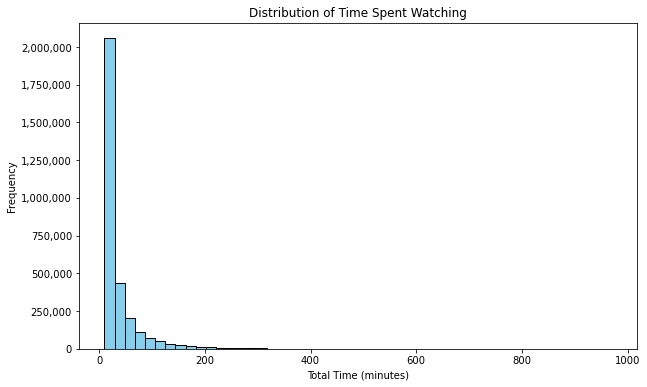

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your histogram plotting code
plt.figure(figsize=(10, 6))
plt.hist(df['time_watched'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Spent Watching')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Frequency')

# Set the y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [10]:
df

,user_id,stream_id,streamer,time_start,time_stop,time_watched,hour_of_day
0,1,33842865744,mithrain,1540,1560,20,1
1,1,33846768288,alptv,1660,1690,30,3
2,1,33886469056,mithrain,5870,5880,10,1
3,1,33887624992,wtcn,5890,5910,20,2
4,1,33890145056,jrokezftw,5910,5940,30,2
...,...,...,...,...,...,...,...
3051728,100000,34167930576,mckytv,35820,35830,10,21
3051729,100000,34168288656,natehill,35820,35830,10,21
3051730,100000,34169594512,fortnite,35820,35840,20,21
3051731,100000,34180223072,highdistortion,37090,37110,20,18


In [17]:
df = df.drop(columns=['stream_id'])

In [8]:
# Create a new binary column 'time_watched_binary' where 1 indicates time_watched <= 10 and 0 otherwise
df['time_watched_binary'] = (df['time_watched'] <= 10).astype(int)

df = df.drop(columns=['time_stop', 'time_watched'])

__Predictive Analysis__

__BASELINE__

In [10]:
(df['time_watched_binary'] == 1).mean()

0.5111492388095551

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is the DataFrame we previously created and modified
# Drop the 'user_id', 'streamer', 'time_watched', and 'time_stop' columns along with the target variable
X = df.drop(['user_id', 'streamer', 'time_watched', 'time_stop', 'time_watched_binary'], axis=1)
y = df['time_watched_binary']  # Target variable is the binary column we created

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

(accuracy)

0.5107291426024868

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Generate a classification report
report_tree = classification_report(y_test, y_pred_tree)

(accuracy_tree)

0.5455781711059446

In [17]:
from sklearn.naive_bayes import BernoulliNB

# Initialize the Bernoulli Naive Bayes classifier
bernoulli_nb_model = BernoulliNB()

# Fit the model to the training data
bernoulli_nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = bernoulli_nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Generate a classification report
report_nb = classification_report(y_test, y_pred_nb)

(accuracy_nb)

0.5123478939029765

In [21]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: NVIDIA GeForce RTX 3070 Ti


In [23]:
df

,user_id,streamer,time_start,time_stop,time_watched,hour_of_day,time_watched_binary
0,1,mithrain,1540,1560,20,1,0
1,1,alptv,1660,1690,30,3,0
2,1,mithrain,5870,5880,10,1,1
3,1,wtcn,5890,5910,20,2,0
4,1,jrokezftw,5910,5940,30,2,0
...,...,...,...,...,...,...,...
3051728,100000,mckytv,35820,35830,10,21,1
3051729,100000,natehill,35820,35830,10,21,1
3051730,100000,fortnite,35820,35840,20,21,0
3051731,100000,highdistortion,37090,37110,20,18,0


In [29]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm



# Encoding categorical data
user_le = LabelEncoder()
streamer_le = LabelEncoder()

df['user_id_encoded'] = user_le.fit_transform(df['user_id'])
df['streamer_encoded'] = streamer_le.fit_transform(df['streamer'])

# Split the dataset
X = df[['user_id_encoded', 'streamer_encoded']].values
y = df['time_watched_binary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define a simple LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, num_users, num_streamers, embedding_dim, hidden_dim, output_dim):
        super(SimpleLSTM, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.streamer_embedding = nn.Embedding(num_streamers, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim * 2, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_user, x_streamer):
        # Embed the user and streamer IDs
        user_embedded = self.user_embedding(x_user).unsqueeze(1)  # Add sequence length dimension
        streamer_embedded = self.streamer_embedding(x_streamer).unsqueeze(1)  # Add sequence length dimension

        # Concatenate along the feature dimension
        combined = torch.cat((user_embedded, streamer_embedded), dim=2)  # Concatenate along the last dimension

        # Pass the combined embeddings through the LSTM
        lstm_out, _ = self.lstm(combined)

        # Pass the output of the LSTM through the linear layer
        output = self.linear(lstm_out[:, -1])
        return output


# Instantiate the model with the appropriate parameters
num_users = len(user_le.classes_)
num_streamers = len(streamer_le.classes_)
embedding_dim = 50 
hidden_dim = 100    
output_dim = 1      

model = SimpleLSTM(num_users, num_streamers, embedding_dim, hidden_dim, output_dim)

# Use the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())

# Create DataLoaders for the training and test sets
train_data = TensorDataset(X_train_tensor[:, 0], X_train_tensor[:, 1], y_train_tensor)
test_data = TensorDataset(X_test_tensor[:, 0], X_test_tensor[:, 1], y_test_tensor)

batch_size = 32  # This is a hyperparameter you can tune
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Training loop
num_epochs = 5  # This is a hyperparameter you can tune
for epoch in range(num_epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for user, streamer, labels in loop:
        user, streamer, labels = user.to(device), streamer.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(user, streamer)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update progress bar
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item())

# Evaluate the model
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for user, streamer, labels in test_loader:
        user, streamer, labels = user.to(device), streamer.to(device), labels.to(device)
        outputs = model(user, streamer)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')


Epoch [5/5]: 100%|██████████████████████████████████████████████████| 76294/76294 [06:22<00:00, 199.22it/s, loss=0.583]


Accuracy: 0.6157
